     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

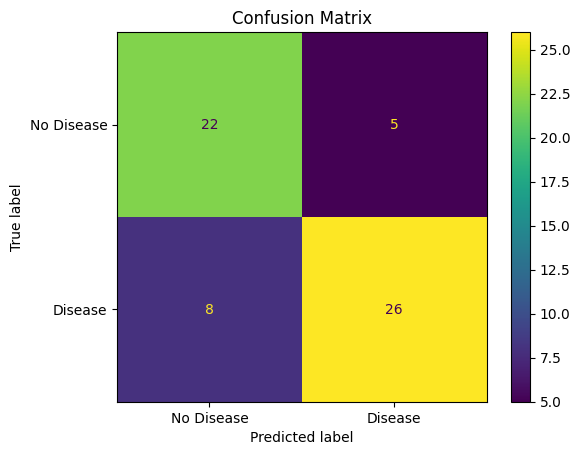

Accuracy: 78.68852459016394
Precision: 83.87096774193549
Recall: 76.47058823529412
F1 Score: 80.0
ROC AUC Score: 0.789760348583878


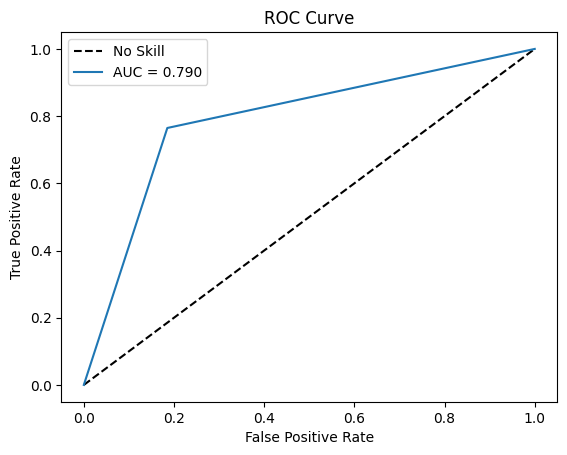

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\D KAVINKUMAR\Downloads\heart.csv")

# Display first 5 rows
df.head()

# Check dataset shape
df.shape

# Check data types
df.dtypes

# Check missing values
df.isnull().sum()

# -----------------------------
# Feature selection & target
# -----------------------------

X = df.drop(columns=['output'])
y = df['output']

print(X)
print(X.shape)

print(y)
print(y.shape)

# -----------------------------
# Class distribution
# -----------------------------

unique_values = np.unique(y)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
    counts[i] = np.count_nonzero(y == value)

for i, value in enumerate(unique_values):
    print(f"Class label: {value}, Count: {counts[i]}")

# -----------------------------
# Train-test split
# -----------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# -----------------------------
# Test set class distribution
# -----------------------------

unique_values = np.unique(y_test)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
    counts[i] = np.count_nonzero(y_test == value)

for i, value in enumerate(unique_values):
    print(f"Class label: {value}, Count: {counts[i]}")

# -----------------------------
# Feature Scaling
# -----------------------------

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Model & metrics
# -----------------------------

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    roc_auc_score
)

# -----------------------------
# Decision Tree Classifier
# -----------------------------

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train, y_train)

preds = dt_model.predict(X_test)

# -----------------------------
# Confusion Matrix
# -----------------------------

classes = ["No Disease", "Disease"]
cm = confusion_matrix(y_test, preds)

print("Confusion Matrix")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Performance Metrics
# -----------------------------

print("Accuracy:", accuracy_score(y_test, preds) * 100)
print("Precision:", precision_score(y_test, preds) * 100)
print("Recall:", recall_score(y_test, preds) * 100)
print("F1 Score:", f1_score(y_test, preds) * 100)

roc_auc = roc_auc_score(y_test, preds)
print("ROC AUC Score:", roc_auc)

# -----------------------------
# ROC Curve
# -----------------------------

fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc_val = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_val:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
